# Spotify Recommender Model

#### Project Overview

With this project, I am looking to create a system to recommend a user songs based on an inputted playlist. To accomplish this, I will obtain a large dataset of Spotify songs over the past century and engineer useful features to differentiate songs between genres.

Users will input their playlists through the Spotify API, which will provide useful metadata for each song. I will transform this metadata into the desired format, and generate a vector that summarizes the data within the playlist.

I can then cycle through the song dataset to identify which songs show the highest correlation to the calculated playlist vector.

This notebook in particular will be focused on understanding this sample dataset, while cleaning and generating meaningful features.

#### Dataset

The dataset for this project is downloaded from Kaggle and is titled "Spotify-Data 1921-2020" from lead author Ekta Negi. The link is provided below:

- https://www.kaggle.com/ektanegi/spotifydata-19212020

The dataset contains 169,909 songs with 19 unique features.

#### Project References

This project was inspired by a tutorial and repository created by Madhav Thaker. Links for this repository and video are provided below:

- https://github.com/madhavthaker/spotify-recommendation-system
- https://www.youtube.com/watch?v=tooddaC14q4&ab_channel=MadhavThaker

## Recomender Systems

There are two general methods for approacing recommender systems:

- Content-Based
- Collaborative Filtering

Content-Based recommender systems focus on the items themselves. These systems look to identify correlations between items that a user contains, and other items that they have not yet interacted with. This method is more accessable using publicly available data. For this project, I will focus on content-based systems, comparing users playlists with a large database of additional songs.

Collaborative filtering uses user interactions with items to assist in suggesting recommendations. This data must be collected over time, and is not available to the public through Kaggle datasets or with the Spotify API.



## Visualize Data

Import our data from a local CSV. Begin to undertand the features of the dataset. Identify any limitations.

It appeats this data is missing some valuable features, particularly information on song genre. This may be worth including with the Spofity API in a future notebook.

#### Import Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import json

#### Read in Data

In [2]:
spotify_df = pd.read_csv('data/data.csv')

In [3]:
spotify_df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


In [4]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      169909 non-null  float64
 1   artists           169909 non-null  object 
 2   danceability      169909 non-null  float64
 3   duration_ms       169909 non-null  int64  
 4   energy            169909 non-null  float64
 5   explicit          169909 non-null  int64  
 6   id                169909 non-null  object 
 7   instrumentalness  169909 non-null  float64
 8   key               169909 non-null  int64  
 9   liveness          169909 non-null  float64
 10  loudness          169909 non-null  float64
 11  mode              169909 non-null  int64  
 12  name              169909 non-null  object 
 13  popularity        169909 non-null  int64  
 14  release_date      169909 non-null  object 
 15  speechiness       169909 non-null  float64
 16  tempo             16

In [5]:
spotify_df.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,169909.000000,169909.000000,1.699090e+05,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000
mean,0.493214,0.538150,2.314062e+05,0.488593,0.084863,0.161937,5.200519,0.206690,-11.370289,0.708556,31.556610,0.094058,116.948017,0.532095,1977.223231
std,0.376627,0.175346,1.213219e+05,0.267390,0.278679,0.309329,3.515257,0.176796,5.666765,0.454429,21.582614,0.149937,30.726937,0.262408,25.593168
min,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1921.000000
25%,0.094500,0.417000,1.710400e+05,0.263000,0.000000,0.000000,2.000000,0.098400,-14.470000,0.000000,12.000000,0.034900,93.516000,0.322000,1957.000000
50%,0.492000,0.548000,2.086000e+05,0.481000,0.000000,0.000204,5.000000,0.135000,-10.474000,1.000000,33.000000,0.045000,114.778000,0.544000,1978.000000
75%,0.888000,0.667000,2.629600e+05,0.710000,0.000000,0.086800,8.000000,0.263000,-7.118000,1.000000,48.000000,0.075400,135.712000,0.749000,1999.000000
max,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.969000,244.091000,1.000000,2020.000000


In [6]:
spotify_df.corr()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
acousticness,1.000000,-0.265950,-0.079311,-0.750283,-0.253690,0.335821,-0.021686,-0.023871,-0.567072,0.046475,-0.593345,-0.056077,-0.204982,-0.185540,-0.624550
danceability,-0.265950,1.000000,-0.134500,0.220569,0.241891,-0.281429,0.022599,-0.105532,0.294170,-0.045306,0.221077,0.225305,-0.004872,0.560242,0.203430
duration_ms,-0.079311,-0.134500,1.000000,0.036396,-0.043811,0.084814,-0.003116,0.034270,-0.014687,-0.046981,0.063292,-0.058449,-0.028816,-0.198760,0.076293
energy,-0.750283,0.220569,0.036396,1.000000,0.142677,-0.287692,0.029984,0.126293,0.782982,-0.038355,0.497488,-0.045226,0.249936,0.350086,0.532419
explicit,-0.253690,0.241891,-0.043811,0.142677,1.000000,-0.138292,0.008578,0.039272,0.152695,-0.083221,0.214044,0.413074,0.011484,-0.022327,0.245227
instrumentalness,0.335821,-0.281429,0.084814,-0.287692,-0.138292,1.000000,-0.014268,-0.047397,-0.417033,-0.035051,-0.299829,-0.115735,-0.107570,-0.193929,-0.291571
key,-0.021686,0.022599,-0.003116,0.029984,0.008578,-0.014268,1.000000,-0.000106,0.021920,-0.112766,0.010675,0.015225,0.003148,0.029064,0.012503
liveness,-0.023871,-0.105532,0.034270,0.126293,0.039272,-0.047397,-0.000106,1.000000,0.052985,0.005393,-0.075293,0.147667,0.008124,-0.000426,-0.055839
loudness,-0.567072,0.294170,-0.014687,0.782982,0.152695,-0.417033,0.021920,0.052985,1.000000,-0.013147,0.466546,-0.105796,0.211114,0.308418,0.490118
mode,0.046475,-0.045306,-0.046981,-0.038355,-0.083221,-0.035051,-0.112766,0.005393,-0.013147,1.000000,-0.032854,-0.057493,0.014539,0.014727,-0.033084


#### Visualize the disptibution of songs per year

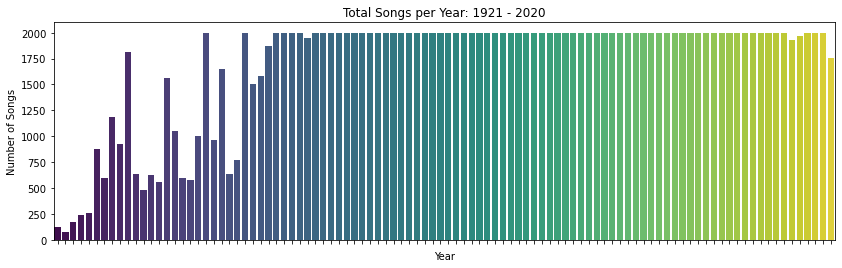

In [7]:
plt.figure(figsize=(14,4))
ax = sns.countplot(x='year',data=spotify_df,palette='viridis')
ax.set(xticklabels = [])
plt.title('Total Songs per Year: 1921 - 2020')
plt.ylabel('Number of Songs')
plt.xlabel('Year')
plt.show()

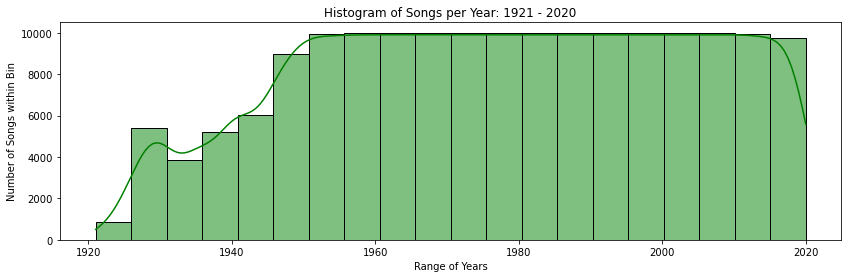

In [8]:
plt.figure(figsize=(14,4))
ax = sns.histplot(spotify_df['year'], color='green', bins=20, alpha=0.5, kde=True)
plt.title('Histogram of Songs per Year: 1921 - 2020')
plt.ylabel('Number of Songs within Bin')
plt.xlabel('Range of Years')
plt.show()

#### Visualize popularity of songs

Songs are given a popularity score between 0 and 100.

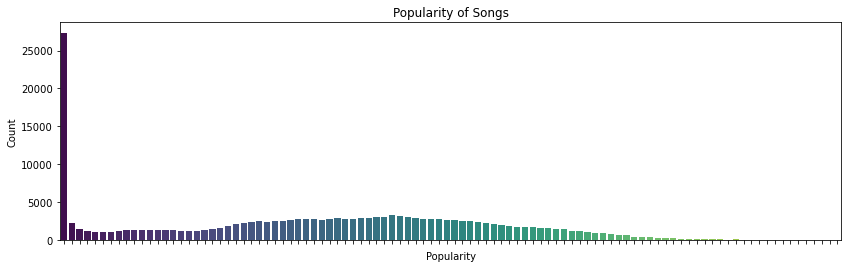

In [9]:
plt.figure(figsize=(14,4))
ax = sns.countplot(x='popularity',data=spotify_df,palette='viridis')
ax.set(xticklabels = [])
plt.title('Popularity of Songs')
plt.ylabel('Count')
plt.xlabel('Popularity')
plt.show()

16.1% of these songs received a popularity of 0

In [10]:
total_zero_popularity = len(spotify_df[spotify_df['popularity'] == 0])
total_songs = len(spotify_df)
print((total_zero_popularity / total_songs) * 100)

16.10097169661407


#### Visualize the distribution between explicit and non-explicit songs

The data appears to be highly skewed towards non-explicit songs. This may be a valuable feature for recommending music when an inputted playlist containes a higher proportion of explicit music.

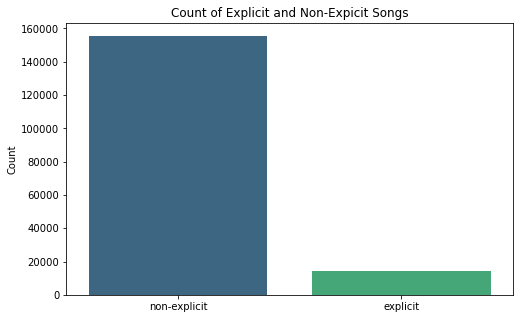

In [11]:
explicit_songs_xticks = ['non-explicit','explicit']

plt.figure(figsize=(8,5))
ax = sns.countplot(x='explicit',data=spotify_df,palette='viridis')
ax.set_xlabel('')
ax.set(xticks=range(len(explicit_songs_xticks)), xticklabels=[i for i in explicit_songs_xticks])

plt.title('Count of Explicit and Non-Expicit Songs')
plt.ylabel('Count')
plt.show()

#### List the most poplular songs and artists

In [12]:
sorted_df = spotify_df.sort_values(by='popularity', ascending=False)

In [13]:
sorted_df[['name', 'artists', 'popularity']].head(30)

,name,artists,popularity
87942,Blinding Lights,['The Weeknd'],100
87940,ROCKSTAR (feat. Roddy Ricch),"['DaBaby', 'Roddy Ricch']",99
87949,death bed (coffee for your head) (feat. beabad...,"['Powfu', 'beabadoobee']",97
87941,THE SCOTTS,"['THE SCOTTS', 'Travis Scott', 'Kid Cudi']",96
87852,ily (i love you baby) (feat. Emilee),"['Surf Mesa', 'Emilee']",95
87946,Toosie Slide,['Drake'],95
87840,The Box,['Roddy Ricch'],95
87844,Supalonely,"['BENEE', 'Gus Dapperton']",95
87943,Party Girl,['StaySolidRocky'],94
87951,GOOBA,['6ix9ine'],94


#### Create a correlation matrix of the numerical features

In [14]:
def return_numeric_features(df):
    numeric_features = df.apply(lambda s: pd.to_numeric(s, errors='coerce').notnull().all())

    non_numeric_features = []
    for feat, value in numeric_features.iteritems():
        if value == False:
            non_numeric_features.append(feat)
            
    print('Non-numeric features: ', non_numeric_features)
    numeric_df = df.drop(non_numeric_features, axis=1)
    
    return numeric_df

In [15]:
numeric_df = return_numeric_features(spotify_df)
numeric_df.head()

Non-numeric features:  ['artists', 'id', 'name', 'release_date']


,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
0,0.995,0.708,158648,0.1950,0,0.563,10,0.1510,-12.428,1,0,0.0506,118.469,0.7790,1928
1,0.994,0.379,282133,0.0135,0,0.901,8,0.0763,-28.454,1,0,0.0462,83.972,0.0767,1928
2,0.604,0.749,104300,0.2200,0,0.000,5,0.1190,-19.924,0,0,0.9290,107.177,0.8800,1928
3,0.995,0.781,180760,0.1300,0,0.887,1,0.1110,-14.734,0,0,0.0926,108.003,0.7200,1928
4,0.990,0.210,687733,0.2040,0,0.908,11,0.0980,-16.829,1,1,0.0424,62.149,0.0693,1928


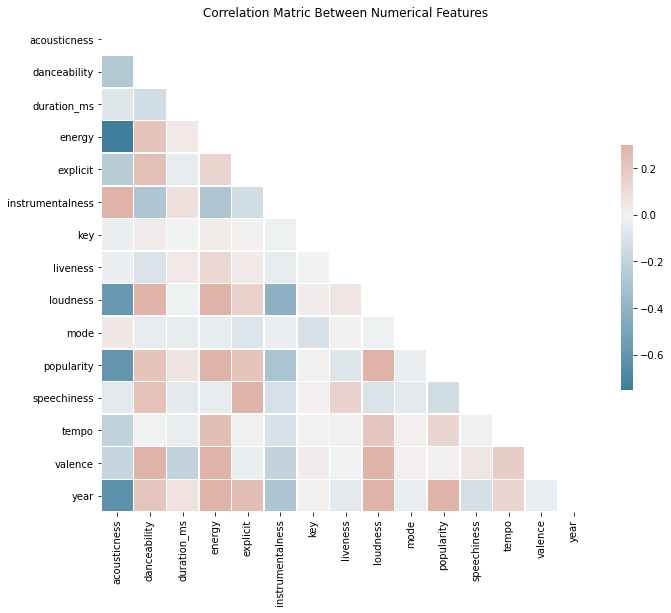

In [16]:
df_corr = numeric_df.corr()

mask = np.triu(np.ones_like(df_corr, dtype=bool))

fig, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matric Between Numerical Features')
plt.show()

Key and mode appear to have particulary low correlations across all other features. This makes sense, as these two features are both related to the tone of the music. For the vast majority of people, this will not be noticable between different songs.

Let's plot the correlation of these two features and see if they are worth dropping.

acousticness        0.046475
valence             0.014727
tempo               0.014539
liveness            0.005393
loudness           -0.013147
popularity         -0.032854
year               -0.033084
instrumentalness   -0.035051
energy             -0.038355
danceability       -0.045306
duration_ms        -0.046981
speechiness        -0.057493
explicit           -0.083221
key                -0.112766
Name: mode, dtype: float64


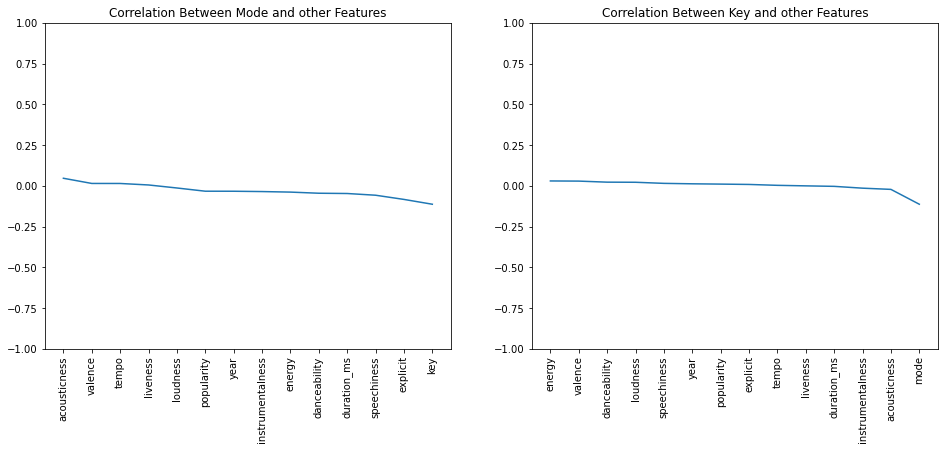

In [17]:
mode_correlations = df_corr['mode'].sort_values(ascending=False).drop('mode')
key_correlations = df_corr['key'].sort_values(ascending=False).drop('key')

print(mode_correlations)
plt.figure(figsize = (16,6))

plt.subplot(1,2,1)
ax1 = mode_correlations.plot()
plt.xticks(rotation = 90)
ax1.set_xticks(np.arange(len(mode_correlations)))
ax1.set_xticklabels(mode_correlations.keys())
ax1.set_ylim([-1,1])
plt.title('Correlation Between Mode and other Features')

plt.subplot(1,2,2)
ax2 = key_correlations.plot()
plt.xticks(rotation = 90)
ax2.set_xticks(np.arange(len(key_correlations)))
ax2.set_xticklabels(key_correlations.keys())
ax2.set_ylim([-1,1])
plt.title('Correlation Between Key and other Features')

plt.show()

There appears to be little to no correlation between Mode/Key and other features, so they will be removed.

In [18]:
clean_df = spotify_df.drop(['mode','key'], axis=1)

In [19]:
clean_df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,liveness,loudness,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,0.1510,-12.428,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,0.0763,-28.454,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,0.1190,-19.924,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,0.1110,-14.734,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,0.0980,-16.829,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


#### Drop the release date column

This column has little importance. It is in a different format for many songs, and should always match the year. Therefore, the information will be captured in the year feature.

In [20]:
clean_df = clean_df.drop(['release_date'], axis=1)

In [21]:
clean_df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,liveness,loudness,name,popularity,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,0.1510,-12.428,Singende Bataillone 1. Teil,0,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,0.0763,-28.454,"Fantasiestücke, Op. 111: Più tosto lento",0,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,0.1190,-19.924,Chapter 1.18 - Zamek kaniowski,0,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,0.1110,-14.734,Bebamos Juntos - Instrumental (Remasterizado),0,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,0.0980,-16.829,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,0.0424,62.149,0.0693,1928


#### Create a dummy variable for year

This value could be bucketed into 5 or 10 year bins, but this may lose some information. Because of this, all unique values will be considered when converting to a dummy variable.

In [22]:
clean_df = pd.get_dummies(clean_df, columns=['year'])

In [23]:
clean_df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,liveness,loudness,...,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,0.1510,-12.428,...,0,0,0,0,0,0,0,0,0,0
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,0.0763,-28.454,...,0,0,0,0,0,0,0,0,0,0
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,0.1190,-19.924,...,0,0,0,0,0,0,0,0,0,0
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,0.1110,-14.734,...,0,0,0,0,0,0,0,0,0,0
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,0.0980,-16.829,...,0,0,0,0,0,0,0,0,0,0


#### Normalize all numeric features

In [24]:
clean_numeric_df = return_numeric_features(clean_df)

Non-numeric features:  ['artists', 'id', 'name']


In [25]:
clean_numeric_df.head()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,liveness,loudness,popularity,speechiness,...,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020
0,0.995,0.708,158648,0.1950,0,0.563,0.1510,-12.428,0,0.0506,...,0,0,0,0,0,0,0,0,0,0
1,0.994,0.379,282133,0.0135,0,0.901,0.0763,-28.454,0,0.0462,...,0,0,0,0,0,0,0,0,0,0
2,0.604,0.749,104300,0.2200,0,0.000,0.1190,-19.924,0,0.9290,...,0,0,0,0,0,0,0,0,0,0
3,0.995,0.781,180760,0.1300,0,0.887,0.1110,-14.734,0,0.0926,...,0,0,0,0,0,0,0,0,0,0
4,0.990,0.210,687733,0.2040,0,0.908,0.0980,-16.829,1,0.0424,...,0,0,0,0,0,0,0,0,0,0


In [26]:
scaler = MinMaxScaler()

scaled_clean_df = pd.DataFrame(scaler.fit_transform(clean_numeric_df), 
                               columns=clean_numeric_df.columns, 
                               index=clean_numeric_df.index)

In [27]:
scaled_clean_df.head()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,liveness,loudness,popularity,speechiness,...,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020
0,0.998996,0.716599,0.028442,0.1950,0.0,0.563,0.1510,0.745000,0.00,0.052219,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.997992,0.383603,0.051316,0.0135,0.0,0.901,0.0763,0.494026,0.00,0.047678,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.606426,0.758097,0.018374,0.2200,0.0,0.000,0.1190,0.627609,0.00,0.958720,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.998996,0.790486,0.032538,0.1300,0.0,0.887,0.1110,0.708887,0.00,0.095562,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.993976,0.212551,0.126450,0.2040,0.0,0.908,0.0980,0.676079,0.01,0.043756,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Combine the normalized features with the caregorical features from clean_df

In [28]:
clean_df.update(scaled_clean_df)

In [29]:
clean_df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,liveness,loudness,...,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020
0,0.998996,['Carl Woitschach'],0.716599,0.028442,0.1950,0.0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,0.1510,0.745000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.997992,"['Robert Schumann', 'Vladimir Horowitz']",0.383603,0.051316,0.0135,0.0,6KuQTIu1KoTTkLXKrwlLPV,0.901,0.0763,0.494026,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.606426,['Seweryn Goszczyński'],0.758097,0.018374,0.2200,0.0,6L63VW0PibdM1HDSBoqnoM,0.000,0.1190,0.627609,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.998996,['Francisco Canaro'],0.790486,0.032538,0.1300,0.0,6M94FkXd15sOAOQYRnWPN8,0.887,0.1110,0.708887,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.993976,"['Frédéric Chopin', 'Vladimir Horowitz']",0.212551,0.126450,0.2040,0.0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,0.0980,0.676079,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Export scaled, cleaned dataset for usage in other notebooks

In [30]:
spotify_keys = json.load(open('spotify_keys.json'))
path = spotify_keys["csv_path"] + "clean_df.csv"
clean_df.to_csv(r'{}'.format(path))